<a href="https://www.kaggle.com/code/erdemtaha/sign-language-classification-tutorial-93-54?scriptVersionId=146137743" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Sign Language Classification**
## 🏆 Accuracy: %93.54


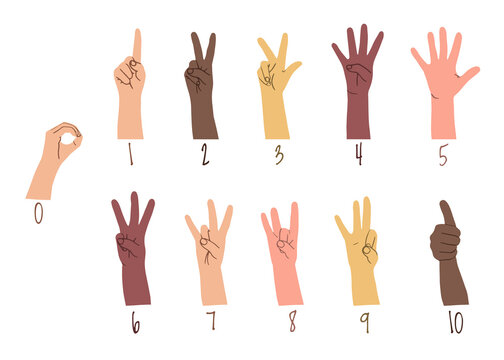


- **The data we will use contains visuals that express the numbers from 0 to 10 in the body language used by hearing impaired individuals to communicate, and the content of this data is as follows:**


- **There are two different contents in the data we will use, one is X.np data, which contains 2062 images with 64x64 dimensions, and the other is Y.np Data, 
    which contains classes from 0 to 10.**


- **Although the data contains 10 classes, I will reduce the data content to 2 classes by reducing the data content so that you can understand and make the project more easily, these will be the pictures and classes corresponding to the numbers 0 and 1 in body language.**


- **Friends who have questions about the project (where you are stuck, where you do not understand, etc.) can contact me at my e-mail address or comment under the project.**
 
- ***Note: Friends who want to develop this project can skip the place where I reduced the data to 2 classes and apply the 10-class version.***

## 🌐 Links:

 #### ✉️ Mail: erdemtahasokullu@gmail.com
 

## Content:
* [**0.** Computation graph of logistic regression](#0)
* [**1.** Library and Input File](#1)
* [**2.** Data Loading and Visualization ](#2)
* [**3.** Data Editing](#3)
* [**4.** Train Test Split](#4)
* [**5.** Flatten Operation](#5)
* [**6.** Transpose operation](#6)
* [**7.** Initialize Weights and Bias](#7)
* [**8.** Sigmoid Function](#8)
* [**9.** Forward Bacward Propagation](#9)
* [**10.** Updating(Learning) Parameters](#10)
* [**11.** Prediction](#11)
* [**12.** Logistic Regressin Algorithm](#12)
* [**13.** Model Result](#13)

<a id = "0"></a>
# Computation graph of logistic regression

### **To explain step by step**

* Parameters are weight and bias.

* Weights: coefficients of each pixels

* Bias: intercept

* z = (w.t)x + b => z equals In an other saying => z = b + px1w1 + px2w2 + ... + px4096*w4096
    * (w.t) ==> Transpose of weight


* Predict Data = y_head 

* y_head = sigmoid(z)

* The sigmoid function reduces the obtained prediction data, i.e. z's, to a value between 0 and 1 

### **Logistic Regression Expression:**

- **Each image consists of 64x64 pixels, totaling 4096 pixels. To calculate the output, we need to multiply these 4096 pixels by 4096 weights. 
  Since each image forms a (1, 4096) matrix, and each weight is also a (1, 4096) matrix, we must transpose one of them for matrix multiplication.**
  
  
- **n this process, it's convenient to initially take the transpose of the image data. Alternatively, you can transpose the weights.
    After transposing and multiplying the weights and pixels, we add the bias term. This operation yields the value 'z,' calculated using 
    the equation mentioned earlier (you can apply 'x.t' instead of 'w.t' as mentioned).**


- **Once we find the 'z' value, it undergoes transformation through the sigmoid function, defined as 1 / (1 + e^(-z)). The purpose of the sigmoid function 
    is to normalize the 'z' values into a range between 0 and 1, making classification more straightforward and consistent. The result of this process is referred 
    to as 'y_head,' which represents the model's prediction or probability. Subsequently, as illustrated in the diagram, a classifier is created to perform 
    the actual classification based on the 'y_head' values.**



- ***Note 1: If you take the transpose of the image data (x data), you must also take the transpose of the y data; otherwise, the classes and features will be mismatched.***

- ***Note 2: If you take the transpose of the image data, i.e. x data, you must also take the y data, otherwise the classes and properties will overlap.***


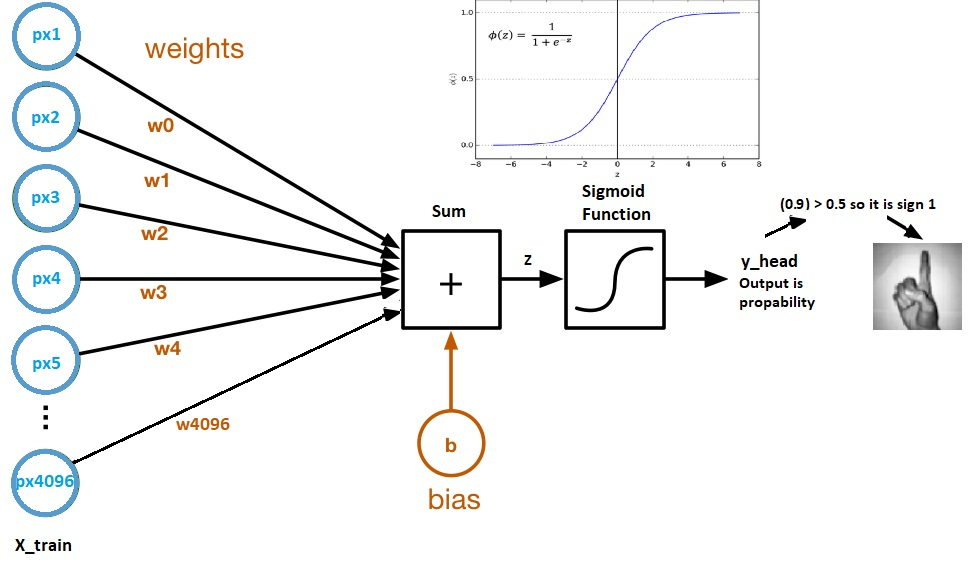

<a id = "1"></a>
# **1.** Library and Input File

In [1]:
# Library
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#Data İnput
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy


 <a id = "2"></a>
 # **2.** Data Loading and Visualization
 * **X.npy ==> (2062,64,64)**
 
 * **Y.npy ==> (2062,10)**
 
 * **I will add the two datasets mentioned above to the code and show their contents**

### X Data Graph and Data Loading
* **X.npy ==> (2062,64,64)**

X Data Visualization


(-0.5, 63.5, 63.5, -0.5)

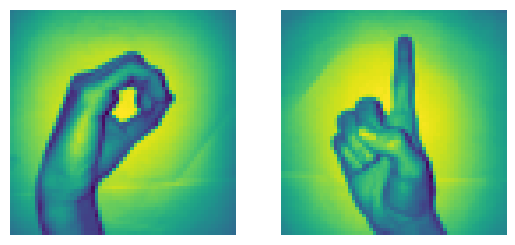

In [2]:
#Data Loading

x_l = np.load('/kaggle/input/sign-language-digits-dataset/X.npy')
Y_l = np.load('/kaggle/input/sign-language-digits-dataset/Y.npy')

#x_l Data Visualization
print("X Data Visualization")
img_size = 64
plt.subplot(1, 2, 1) #y,Area_square,x
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

### Y Data Graph
* **Y.npy ==> (2062,10)**

In [3]:
# Y_l Data Graph
pd.DataFrame(Y_l)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<a id = "3"></a>
# **3.** Data Editing 
* **We will reduce the entire dataset into two classes, and instead of using the dataset's original target labels, we will create our own.**

* **The data from index 204 to 409 corresponds to images representing the number zero in sign language, while the data from index 822 to 1027 represents images corresponding to the number one in sign language.**

* **In this scenario, we have 205 images representing the number one and 205 images representing the number zero. Therefore, we need to create a matrix consisting of zeros and ones, totaling 410 entries. This matrix will be our y data.**

In [4]:
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0)  
z = np.zeros(205) 
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1) 

print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


<a id = "4"></a>
# **4.** Train Test Split

* **In this step, we divide our newly created y dataset and organized x dataset into two sets: train and test**


* **The split ratio is 85% for training and 15% for testing.**

* **Additionally, we define two variables, 'number_of_train' and 'number_of_test,' which will be explained in the following section.
    These variables are essential for the flatten structure**

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=99)
number_of_train = X_train.shape[0]#348
number_of_test = X_test.shape[0]#62
print("Contents of X_train data: {} ".format(X_train.shape))
print("Contents of X_test data: {} ".format(X_test.shape))

Contents of X_train data: (348, 64, 64) 
Contents of X_test data: (62, 64, 64) 


<a id = "5"></a>
# **5.** Flatten Operation

* **Data Structure Transformation: The Flatten operation is especially applied to multi-dimensional arrays or tensors. For example, a 2D or 3D array (matrix or tensor) is transformed into a one-dimensional array as a result of the flatten operation.**

* **Consider a dataset containing 348 images, each with a resolution of 64x64 pixels. Instead of providing these images as matrices directly to a neural network, you can employ the flatten operation to convert each 64x64 image into a 64x64 = 4096-dimensional vector. This transformation can facilitate more efficient and effective learning for the neural network.**

* **(number_of_train, X_train.shape[1] * X_train.shape[2])" in this equation, the first value indicates how many images are contained in the X_train data, while the second value, which is (X_train.shape[1]*X_train.shape[2]), takes the two values, (64,64), and multiplies them to create a single value, which is 4096. This transformation reduces the 3D matrix with dimensions (348, 64, 64) to a 2D matrix with dimensions (348, 4096).**

In [6]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])#348,64*64
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])#62,64*64
print("Contents of X_train_flatten data: {} ".format(X_train_flatten.shape))
print("Contents of X_test_flatten data: {} ".format(X_test_flatten.shape))

Contents of X_train_flatten data: (348, 4096) 
Contents of X_test_flatten data: (62, 4096) 


<a id = "6"></a>
# **6.** Transpose operation
* **As mentioned in the previous sections, since an image is represented as a 1x4096 matrix, and we need to multiply it with a weight matrix of dimensions 1x4096, we need to take the transpose of one of them.**

* **In matrix multiplication, two matrices must not have the same shape.**

* **In this project, I find it more convenient to transpose the image matrix.**

* **However, if you prefer, you can transpose the weight matrix in your own training, and the results will remain unchanged.**

In [7]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("Contents of x train: {} ".format(x_train.shape))
print("Contents of x test: {} ".format(x_test.shape))
print("Contents of y train: {} ".format(y_train.shape))
print("Contents of y test: {} ".format(y_test.shape))

Contents of x train: (4096, 348) 
Contents of x test: (4096, 62) 
Contents of y train: (1, 348) 
Contents of y test: (1, 62) 


<a id = "7"></a>
# **7.** Initialize Weights and Bias

* **When determining the values of the weights and bias, we use the general standard of 0.01 for w and 0.0 for b.**


* **In order for w to exist for each feature, we print 0.01 in a matrix of feature size by making np.full(dimension,1),0.01)**

In [8]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)#np.full(x,y),0.01)
    b = 0.0
    return w, b

<a id = "8"></a>
# **8.** Sigmoid Function

* **The sigmoid function facilitates classification by scaling the input value between 0 and 1 and also allows backward processing as it can be derivatized.**


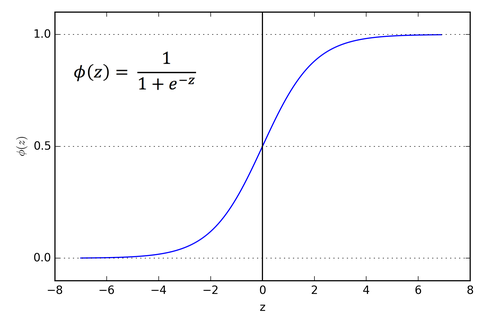

In [9]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z)) #sigmoid function
    return y_head

<a id = "9"></a>
# **9.** Forward Bacward Propagation
* **Forward**
    * The Forward structure is a forward working version of the logistic regression structure
    
    
* **Bacward**
    * Bacward finds the average change in weight and bias with the derivative, called the "slope", which is the slope of the tangents drawn to the differentiable function on the graph of the cost. The closer the cost is to 0, the better the weight or bias is

* **Gradient Descent**
    * Initially the cost value depends on the initial values of weight and bias, so we need to update weight and bias to reduce the cost. 

    * In other words, our models need to learn the bias and weight parameters to minimize the cost
    
    * Slope = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    * or Slope = np.sum(y_head-y_train)/x_train.shape[1] 
    
* **For Example:**
    
    * Let's take weight = 5 and assume bias = 0, as a result cost=1.5

    * As you can see from the graph, cost is not at the minimum value at the moment, so we need to update the bias and weight values (Update Icon := )

    * Slope1 = 3 and w:=w-slope and eventually w = 2 and cost becomes 0.4

    * If we update again, slope2=0.7 and w := 1.3 and cost becomes 0.3

    * If we do it again, w = 1.3 reaches 1.2 and the slope is 0.01 because the minimum cost value has been reached, so slope 3 is not applied.

    * In other words, if we subtract the slope of that point from the position of weight on the graph, the slope of the point on the function graph will also be reduced.

    * Note: Slope is where a point cuts the graph perpendicularly, i.e. the slope of this point with respect to the function. Slope is also called Step





    
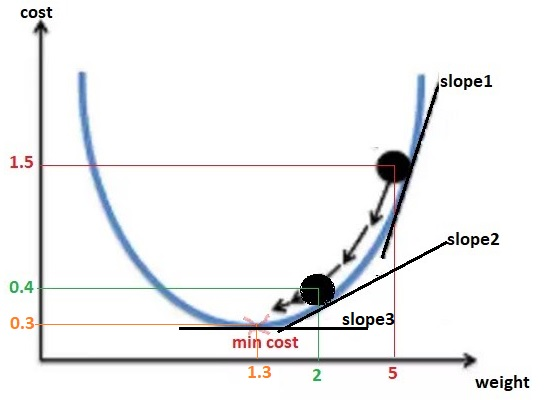


* **Loss Function**
    * Is the margin of error in the data
    
    
    
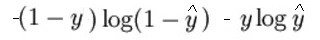

In [10]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1]     
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

<a id = "10"></a>
# **10.** Updating(Learning) Parameters
* **At this point, we will update the weight and bias values with the values we obtained in the previous sections and improve the model according to the cost values of the results obtained after these updated values.**


* **This code pattern will also allow us to learn about the gradient decent algorithm by suppressing one out of every 10 costs obtained**

In [11]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
      
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

<a id = "11"></a>
# **11.** Prediction

* **Classifies all z-values obtained one by one according to whether they are less than 0.5**

    * **if z is bigger than 0.5 our prediction is sign one (y_head = 1)**

    * **if z is smaller than 0.5 our prediction is sign one (y_head = 0)**

In [12]:
#Predict
def predict(w,b,x_test):
   
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0 
        else:
            Y_prediction[0,i] = 1

    return Y_prediction



<a id = "12"></a>
# **12.** Logistic Regressin Algorithm

* **In this study, we have developed a study classification by developing our own model without using any model library.**


* ***Note: I have added a structure to the project where you can visually test your model, so that the number of indexes you specify corresponds to which image in the test data, that image is printed and the result predicted by the model is printed under the image.***


Cost after iteration 0: 14.068391
Cost after iteration 10: 2.517130
Cost after iteration 20: 2.504583
Cost after iteration 30: 2.329055
Cost after iteration 40: 2.122865
Cost after iteration 50: 1.914485
Cost after iteration 60: 1.705598
Cost after iteration 70: 1.483363
Cost after iteration 80: 1.233053
Cost after iteration 90: 0.949608
Cost after iteration 100: 0.645529
Cost after iteration 110: 0.373387
Cost after iteration 120: 0.234119
Cost after iteration 130: 0.203729
Cost after iteration 140: 0.196578


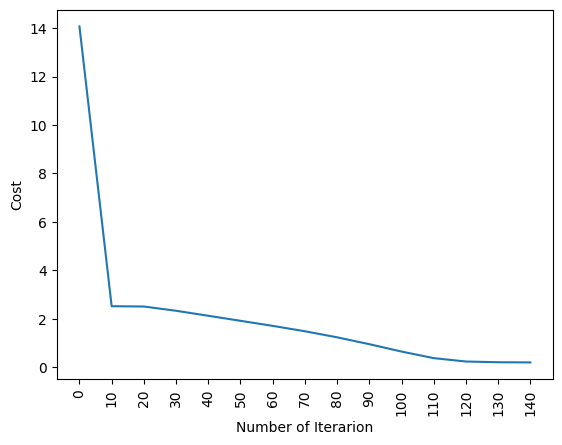

train accuracy: 93.10344827586206 %
test accuracy: 93.54838709677419 %


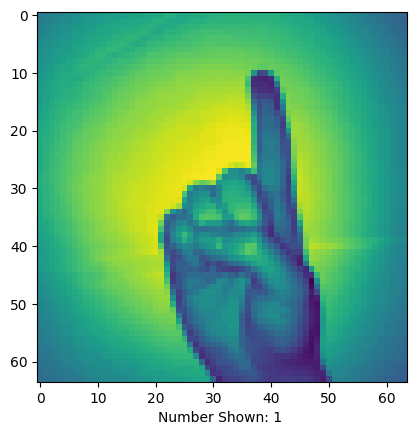

In [13]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0] 
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    img_size= 64
    plt.imshow(X_test[9].reshape(img_size, img_size))
    plt.xlabel("Number Shown: {} ".format(int(y_prediction_test[0,9])))
    plt.axis('on')
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate=0.01 ,num_iterations = 150)

<a id = "13"></a>
# 13. Model Result

* **We have reached a cost value of 0.196578 after 140 updates from 14.068391 cost value. As a result, the model reached the desired number of rounds and proved to be a healthy model by reaching the test accuracy of 93.54838709677419%. As noticed, the cost value started to decrease less as the accuracy value approached 100.**

**For example**

**Cost after 100 iterations: 0.645529**

**Cost after iteration 110: 0.373387**

**Cost after iteration 120 : 0.234119**

**Cost after iteration 130: 0.203729**

**Cost after iteration 140: 0.196578**


* **From round 130 to round 140, there was only an average decrease of 0.007. This shows that the error rate decreases to very minimal values as the accuracy rate increases, as seen in the graph. In this case, the training is finished and the result is considered sufficient as further training does not contribute much to the model.**